# Barcode and QR Code Detection

## Introduction
This notebook demonstrates the integration of barcode and QR code scanning functionalities as part of the take-home project for Standard Bots. It aligns with the user flow diagram and Figma prototype to provide a comprehensive understanding of the application's functionality. This guide will showcase both detection and decoding capabilities, as well as illustrate how these technologies can be dynamically implemented within a broader system.

### Installation of Libraries

In [1]:
# Install necessary libraries for barcode and QR code detection
import os
import sys
import subprocess
import platform
import requests
import numpy as np
import cv2
import qrcode
from PIL import Image # PIL and qrcode are used for generating and handling QR code images
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode # pyzbar is used for decoding barcodes and QR codes from images


In [2]:
# Function to install necessary libraries
def install_libraries():
    if platform.system() == "Windows":
        subprocess.check_call([sys.executable, "-m", "pip", "install", 'pyzbar'])
    elif platform.system() == "Linux":
        subprocess.check_call(["apt-get", "install", "-y", "libzbar0"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", 'pyzbar'])
    elif platform.system() == "Darwin":  # macOS
        subprocess.check_call(["brew", "install", "zbar"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", 'pyzbar'])
    else:
        print("Unsupported OS")

install_libraries()


In [3]:
# Function to download image files
def download_file(url, filename):
    if not os.path.exists(filename):
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, "wb") as file:
                file.write(response.content)
        else:
            print("Failed to download the file.")

## Generating QR Code for Demonstration

This section includes QR code generation to demonstrate how QR codes can be dynamically created and utilized within this project. Since viewers might not have access to a physical QR code during this demonstration, generating one here allows for a complete demonstration of both detection and encoding capabilities within the same notebook, providing a full-circle view of the technology's application.

### QR Code Generation

In [4]:
# Data to be encoded in the QR Code
data = 'https://brandikinard.com/'
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(data)
qr.make(fit=True)

img_pil = qr.make_image(fill_color="black", back_color="white").convert('RGB')
img_np = np.array(img_pil)  # Convert PIL Image to numpy array

### Download and Display Images

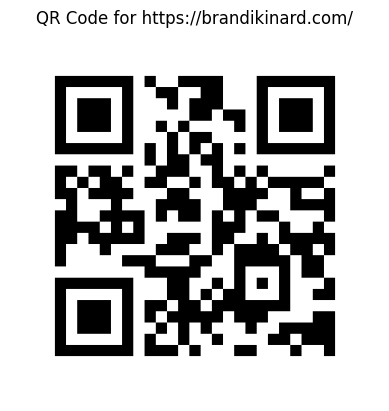

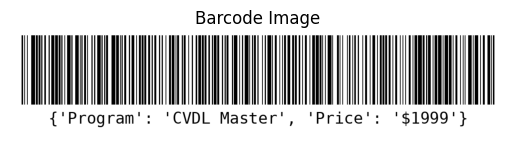

In [5]:
# Display the QR Code
plt.imshow(img_np, cmap='gray')
plt.title("QR Code for " + data)
plt.axis("off")
plt.show()

# Download and display barcode image
# The following URL links to an image of a barcode which will be used to demonstrate the detection capabilities
barcode_url = "https://www.dropbox.com/scl/fi/rz1n9rs3ruzs5o45x34y6/Barcode.png?rlkey=srr69yrtzlrua4v2khe56gutd&dl=1"
download_file(barcode_url, "Barcode.png")
barcode_image = cv2.imread("Barcode.png")

# The image is displayed to confirm it's correctly loaded before processing
plt.imshow(barcode_image, cmap='gray')
plt.title("Barcode Image")
plt.axis("off")
plt.show()

### Detection and Decoding Function

In [6]:
# Define a function to detect and decode barcodes and QR codes from provided images
# This function utilizes the pyzbar library to decode the data within the images
# Detected barcodes and QR codes are outlined with a rectangle, and their data is printed

# Detect and decode the barcode and QR code
def detect_decode(image):
    decoded_objects = decode(image)
    if decoded_objects:
        for obj in decoded_objects:
            print("Type:", obj.type)
            print("Data:", obj.data.decode('utf-8'))
            x, y, w, h = obj.rect
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    else:
        print("No barcode/QR code detected")
    plt.imshow(image[...,::-1])  # Ensure correct display of color images
    plt.show()

## Displaying Detection Results

The results of barcode and QR code detection are visualized to provide immediate feedback. This part is crucial for verifying the correct functioning of the decoding process and aligns with the 'Display Scan Results' step in the user flow diagram, showcasing how the application provides feedback to the user.


Type: CODE128
Data: {'Program': 'CVDL Master', 'Price': '$1999'}


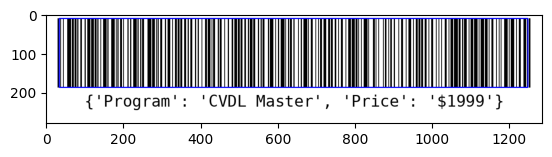

Type: QRCODE
Data: https://brandikinard.com/


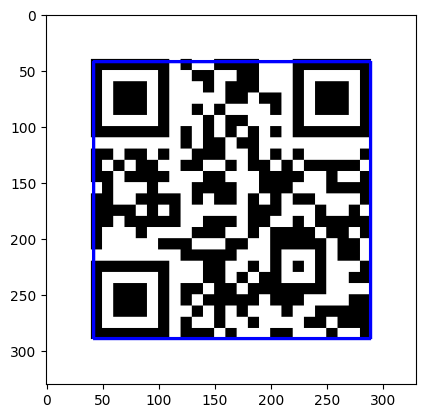

In [7]:
detect_decode(barcode_image)
detect_decode(img_np)  # Ensure we pass the correct image format

## Summary

This notebook, along with the linked Figma prototype and user flow diagram, forms a complete narrative that demonstrates how the barcode scanning functionality integrates within the broader application framework. It provides both a technical demonstration and a user-centric view of the project, emphasizing practical application of the technologies discussed.
